# Linear Regression Using Tensorflow

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

In [2]:
x_data = np.linspace(0.0,10.0,1000000)

In [3]:
noise = np.random.randn(len(x_data))

In [4]:
noise

array([-0.47531488, -1.49436835, -0.16427911, ..., -0.09105685,
       -0.00477735,  0.84093219])

In [5]:
#y = mx + b
#b=5

y_true = (0.5 * x_data) + 5 + noise

In [6]:
#X dataframe
x_df = pd.DataFrame(data=x_data,columns=['X Data'])

In [7]:
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [8]:
y_df.head()

,Y
0,4.524685
1,3.505637
2,4.835731
3,4.003034
4,6.995685


In [9]:
my_data = pd.concat([x_df,y_df],axis=1)

In [10]:
my_data.head()

,X Data,Y
0,0.00000,4.524685
1,0.00001,3.505637
2,0.00002,4.835731
3,0.00003,4.003034
4,0.00004,6.995685


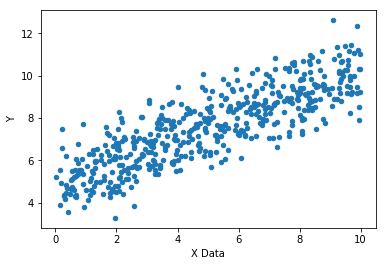

In [11]:
my_data.sample(n=500).plot(kind="scatter",x="X Data",y='Y')

In [12]:
batch_size = 8

In [13]:
m = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())

In [14]:
x_placeholder = tf.placeholder(tf.float32,shape=[batch_size])
y_placeholder = tf.placeholder(tf.float32,[batch_size])

In [15]:
y_model = m * x_placeholder + b

In [16]:
error = tf.reduce_sum(tf.square(y_placeholder - y_model))

In [17]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [18]:
init = tf.global_variables_initializer()

In [19]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 10000
    
    for i in range(batches):
        rand_idx = np.random.randint(len(x_data),size=batch_size)
        feed = {x_placeholder:x_data[rand_idx],y_placeholder:y_true[rand_idx]}
        
        sess.run(train,feed_dict=feed)
    
    model_m , model_b = sess.run([m,b])

In [20]:
model_m

0.5375046

In [21]:
model_b

4.986333

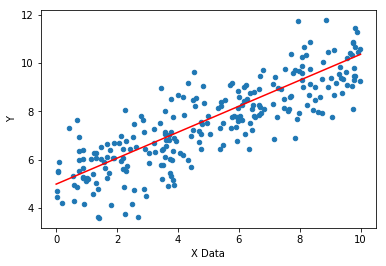

In [22]:
y_pred = x_data * model_m + model_b

my_data.sample(250).plot(kind="scatter",x='X Data',y="Y")
plt.plot(x_data,y_pred,'r')

## TF ESTIMATOR

In [23]:
feat_cols = [ tf.feature_column.numeric_column('x',shape=[1])]

In [24]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\sumit\\AppData\\Local\\Temp\\tmpudvlndjo', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001B2685987F0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_data,y_true,test_size=0.3,random_state=1)

In [28]:
print(x_train.shape)
print(x_test.shape)

(700000,)
(300000,)


In [34]:
input_fn = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=None,shuffle=True)

In [35]:
train_input_fn = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=1000,shuffle=False)

In [36]:
test_input_fn = tf.estimator.inputs.numpy_input_fn({'x':x_test},y_test,batch_size=4,num_epochs=1000,shuffle=False)

In [37]:
#train the estimator

estimator.train(input_fn=input_fn,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\sumit\AppData\Local\Temp\tmpudvlndjo\model.ckpt.
INFO:tensorflow:loss = 273.66296, step = 1
INFO:tensorflow:global_step/sec: 755.627
INFO:tensorflow:loss = 8.74667, step = 101 (0.159 sec)
INFO:tensorflow:global_step/sec: 815.741
INFO:tensorflow:loss = 17.906725, step = 201 (0.091 sec)
INFO:tensorflow:global_step/sec: 1086.93
INFO:tensorflow:loss = 3.877568, step = 301 (0.096 sec)
INFO:tensorflow:global_step/sec: 1162.01
INFO:tensorflow:loss = 8.133876, step = 401 (0.087 sec)
INFO:tensorflow:global_step/sec: 1079.51
INFO:tensorflow:loss = 2.0190728, step = 501 (0.088 sec)
INFO:tensorflow:global_step/sec: 1115.84
INFO:tensorflow:loss = 3.940581, step = 601 (0.090 sec)
INFO:tensorflow:global_step/sec: 

In [38]:
#evaluating 

train_metrics = estimator.evaluate(input_fn=train_input_fn,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-08-18-13:44:04
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\sumit\AppData\Local\Temp\tmpudvlndjo\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-08-18-13:44:05
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1505889, global_step = 1000, loss = 4.6023555
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\sumit\AppDa

In [39]:
test_metrics = estimator.evaluate(input_fn=test_input_fn,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-08-18-13:44:49
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\sumit\AppData\Local\Temp\tmpudvlndjo\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-08-18-13:44:50
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1490948, global_step = 1000, loss = 4.5963793
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\sumit\AppDa

In [41]:
print("train metrics: {}".format(train_metrics))
print("test_metrics: {}".format(test_metrics))

train metrics: {'average_loss': 1.1505889, 'loss': 4.6023555, 'global_step': 1000}
test_metrics: {'average_loss': 1.1490948, 'loss': 4.5963793, 'global_step': 1000}


In [43]:
#predictions
input_fn_pred = tf.estimator.inputs.numpy_input_fn({'x':np.linspace(0,10,10)},shuffle=False)

In [78]:
list(estimator.predict(input_fn=input_fn_pred))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\sumit\AppData\Local\Temp\tmpudvlndjo\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.2864876], dtype=float32)},
 {'predictions': array([4.970731], dtype=float32)},
 {'predictions': array([5.6549745], dtype=float32)},
 {'predictions': array([6.3392177], dtype=float32)},
 {'predictions': array([7.0234613], dtype=float32)},
 {'predictions': array([7.7077045], dtype=float32)},
 {'predictions': array([8.391948], dtype=float32)},
 {'predictions': array([9.076191], dtype=float32)},
 {'predictions': array([9.760435], dtype=float32)},
 {'predictions': array([10.444677], dtype=float32)}]

In [83]:
predictions=[]
for x in estimator.predict(input_fn=input_fn_pred):
   predictions.append(x['predictions'][0])

print(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\sumit\AppData\Local\Temp\tmpudvlndjo\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[4.2864876, 4.970731, 5.6549745, 6.3392177, 7.0234613, 7.7077045, 8.391948, 9.076191, 9.760435, 10.444677]


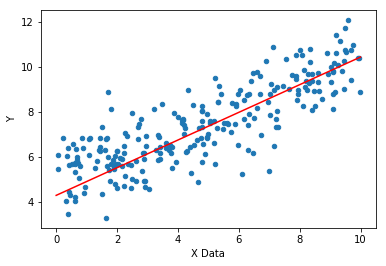

In [84]:
my_data.sample(250).plot(kind='scatter',x="X Data",y='Y')
plt.plot(np.linspace(0,10,10),predictions,'r')